# Introduction

This notebook uses a [salary dataset from Kaggle](https://www.kaggle.com/nilimajauhari/glassdoor-analyze-gender-pay-gap) which originally came from GlassDoor. Using this sample data, I show examples of different ways to create error bars for a Medium blog post.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Data Gathering and Cleaning

In [2]:
df = pd.read_csv('data/Glassdoor Gender Pay Gap.csv')
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
df.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [7]:
cols = ['JobTitle', 'Gender', 'Education', 'Dept']

for col in cols:
    display(df[col].value_counts())
    print()
    

Marketing Associate    118
Software Engineer      109
Financial Analyst      107
Data Scientist         107
Graphic Designer        98
IT                      96
Sales Associate         94
Driver                  91
Warehouse Associate     90
Manager                 90
Name: JobTitle, dtype: int64

Male      532
Female    468
Name: Gender, dtype: int64

High School    265
Masters        256
College        241
PhD            238
Name: Education, dtype: int64

Operations        210
Sales             207
Management        198
Administration    193
Engineering       192
Name: Dept, dtype: int64

We have a set of 1000 observations, so certainly only a sample of employees across GlassDoor. There are some pieces of information that I don't know (such as where geographically the employees are located) or how many different companies they were pulled from. However, there seems to be a decent representation of employees from different educational backgrounds, genders, and the subset of titles included here.

# Exploration

In [45]:
genders = ['Female', 'Male']
mean_salaries = {}

for gender in genders:
    print(f"Gender: {gender}")
    display(df.loc[df['Gender'] == gender, 'BasePay'].describe())
    mean_salaries[f"{gender} Mean Salary"] = df.loc[df['Gender'] == gender, 'BasePay'].mean()
    print()

Gender: Female


count       468.000000
mean      89942.818376
std       24378.277510
min       34208.000000
25%       73186.250000
50%       89913.500000
75%      106923.250000
max      160614.000000
Name: BasePay, dtype: float64


Gender: Male


count       532.000000
mean      98457.545113
std       25517.520327
min       36642.000000
25%       81452.500000
50%       98223.000000
75%      115606.250000
max      179726.000000
Name: BasePay, dtype: float64

Let's take a look at the distributions of BasePay for Males and Females.

In [68]:
# custom color palette
gender_palette = sns.color_palette(palette=['deeppink','darkblue'])

# set Seaborn style
sns.set_style("whitegrid")

# custom currency format
def format_currency(x, pos):
    if abs(x) >= 1000000000:
        return '${:1.2f}B'.format(x*1e-9)
    # over 10 million
    elif abs(x) >= 10000000:
        return '${:1.1f}M'.format(x*1e-6)
    # over 1 million
    elif abs(x) >= 1000000:
        return '${:1.2f}M'.format(x*1e-6)
    elif x == 0:
        return '${:0}'.format(x)
    elif abs(x) >= 1000:
        return '${:1.1f}K'.format(x*1e-3)
    else:
        return '${:.1f}'.format(x)

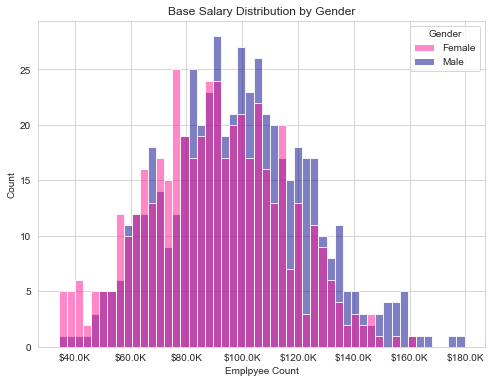

In [69]:
# create figure
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df, x='BasePay', hue='Gender', bins=50, ax=ax, 
             palette=gender_palette, legend=True)

ax.set_title('Base Salary Distribution by Gender')
ax.set_xlabel('Base Salary')
ax.set_xlabel('Emplpyee Count')
ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_currency));

Salaries for Male employees do extend into a higher range than that for Females, and Female salaries have more in the lower range.

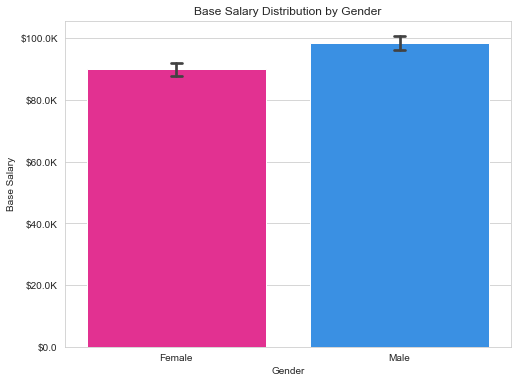

In [70]:
# custom color palette
gender_palette2 = sns.color_palette(palette=['deeppink','dodgerblue'])

# create figure
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df, y='BasePay', x='Gender', ax=ax, 
             palette=gender_palette2, capsize=0.05)

ax.set_title('Base Salary Distribution by Gender')
ax.set_ylabel('Base Salary')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_currency));

First, let's think about what our data represents and what we're really trying to answer. 

We have a dataset of 1000 employees and their salaries. Although there are some variables we can't be sure have been controlled for (such as age and geographical location) we do appear to have a pretty even distribution of genders, education levels, and titles in this sample. We'll assume here that our sample of 1000 employees is representative of a  population of employees in an industry such as tech.

We can easily calculate the mean salaries for males versus females in our sample and see which is larger. In our sample, the mean male salary is about $8,500 greater than the mean female salary.

However, typically we're less interested in the exact statistics of our sample set, and more interested in the question of whether this holds true for the entire population. How confident should we be that the sample means are representative of the true population means? To answer this question, we can use statistics such as how much natural variation there is in the data (the standard deviation of our sample) and the size of our sample to estimate the standard error of the mean, or how much we estimate our sample mean will differ from the population mean in either direction.

Each random sample from the greater population will have slightly different values, so the mean would be slightly different too. Each sample mean will differ slightly from the population mean, and multiple sample means will also differ from each other. The Central Limit Theorem states that if we were to repeat the random sampling process over and over and record the means of each sample, the mean of sample means would get closer and closer to the true population mean the more samples we pulled. Since we typically don't have access to the full population, we can't perform this many different random samples. 

However, bootstrapping is one way we can approximate this process, even though we're using data from only a single sample. Using bootstrapping, we can generate a bunch of random samples with replacement from our existing sample data, and calculate the means and mean of sample means. The standard deviation of the resampled means is a good estimate of the standard error of any given sample mean from the population.

Here, we've used the default 68% confidence interval that Seaborn calculates for us using bootstrapping. Bootstrapping is resampling the dataset with replacement many times, and calculating the mean of each new sample and recording it. At the end, we're left with a set of sample means. If we get the mean of bootstrapped sample means, we can use this as a good estimate of our population, and we can use the standard deviation of the sample means as a good representation of the standard error. This method can be used in place of the usual formula to estimate standard error when we have only a single sample, which would be standard deviation of the single sample / sqrt n.

Error bars that use the standard error are showing by how much we would expect the mean of the sample we did use to differ from the true population mean. When evaluating standard error bars, therefore we're checking...?

The default confidence interval that Seaborn plots is 95%, although we can adjust that if we want.